# Profit Prediction

In [1]:
#Kütüphanalerin Okunması
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("profitdataset.csv")

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
df.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<AxesSubplot:>

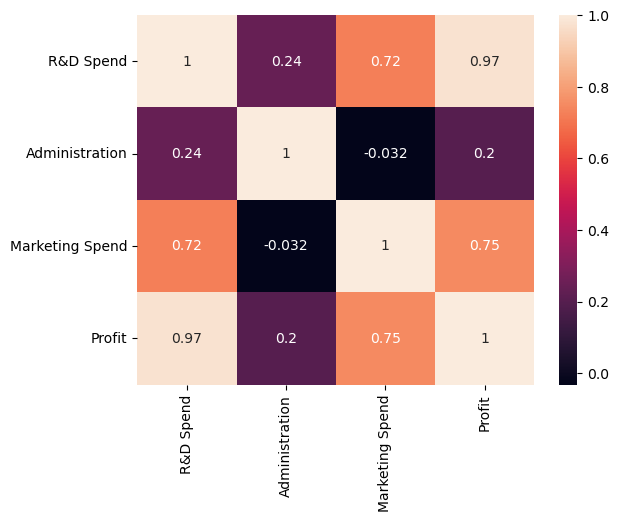

In [7]:
sns.heatmap(df.corr(),annot=True)

# Modeling

In [16]:
x = df[["R&D Spend", "Administration", "Marketing Spend"]]
y = df["Profit"]
Model_Predict=df[["R&D Spend", "Administration", "Marketing Spend"]]
x = x.to_numpy()
y = y.to_numpy()
y = y.reshape(-1, 1)

In [17]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

In [19]:
data = pd.DataFrame(data={"Predicted Profit": ypred.flatten()}) 

In [20]:
data.head()

,Predicted Profit
0,126703.027165
1,84894.750816
2,98893.418160
3,46501.708150
4,129128.397344


# Classical Regression Model

In [21]:
### Regression Modelleri için Bir Function Create Ediyoruz
def fnc_regression_all_model(x,y,predict_test):
    from sklearn.linear_model import LinearRegression
    from sklearn.linear_model import Ridge,Lasso
    from sklearn.linear_model import ElasticNet
    from sklearn.tree import ExtraTreeRegressor
    from sklearn.ensemble import GradientBoostingRegressor
    from sklearn.neighbors import KNeighborsRegressor
    
    from sklearn.model_selection import train_test_split

    from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
    
    
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

    L=LinearRegression()
    R=Ridge()
    Lass=Lasso()
    E=ElasticNet()
    ExTree=ExtraTreeRegressor()
    GBR=GradientBoostingRegressor()
    KN=KNeighborsRegressor()
    
    algos=[L,R,Lass,E,ExTree,GBR,KN]
    algo_names=['LinearRegression','Ridge','Lasso','ElasticNet','ExtraTreeRegressor','GradientBoostingRegressor','KNeighborsRegressor']
    r_squared=[]
    rmse=[]
    mae=[]
    
    result=pd.DataFrame(columns=['R_Squared','RMSE','MAE'],index=algo_names)
    
    for item in algos:
        item.fit(x_train,y_train)
        item.predict(x_test)
        r_squared.append(r2_score(y_test,item.predict(x_test)))
        rmse.append((mean_squared_error(y_test,item.predict(x_test)))**.5)
        mae.append(mean_absolute_error(y_test,item.predict(x_test)))
        
    result.R_Squared=r_squared
    result.RMSE=rmse
    result.MAE=mae
    
    fnc_regression_all_model.predict1_df2_survived=GBR.predict(predict_test)
    
    
    return result.sort_values('R_Squared',ascending=False)

In [22]:
fnc_regression_all_model(x,y,Model_Predict)

,R_Squared,RMSE,MAE
Lasso,0.900065,8995.905778,6979.152235
ElasticNet,0.900065,8995.905792,6979.152246
LinearRegression,0.900065,8995.905803,6979.152252
Ridge,0.900065,8995.905803,6979.152252
GradientBoostingRegressor,0.895477,9200.086892,8480.981492
ExtraTreeRegressor,0.853096,10906.959922,6657.034000
KNeighborsRegressor,0.294901,23895.260822,14869.748600


# PyCaret Regression Tahminleme Yapalım

In [23]:
from pycaret.regression import*

In [24]:
##Modelimizi Compile Ediyoruz
exp_name=setup(df,target='Profit')

,Description,Value
0,Session id,2151
1,Target,Profit
2,Target type,Regression
3,Original data shape,"(50, 5)"
4,Transformed data shape,"(50, 7)"
5,Transformed train set shape,"(35, 7)"
6,Transformed test set shape,"(15, 7)"
7,Numeric features,3
8,Categorical features,1
9,Preprocess,True


In [25]:
##Eniyi Model Karşılaştırması
best_model=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
br,Bayesian Ridge,6731.4280,90969180.9444,8018.7504,0.9099,0.1274,0.1177,0.1820
en,Elastic Net,6759.5589,94579392.1018,8150.5648,0.9089,0.1270,0.1183,0.2020
omp,Orthogonal Matching Pursuit,6763.0699,90690683.2966,8171.1172,0.9044,0.1277,0.1167,0.1860
ridge,Ridge Regression,7157.4328,103514933.5633,8514.7060,0.9030,0.1305,0.1246,0.1780
lr,Linear Regression,7248.0948,105703623.6087,8598.2255,0.9015,0.1313,0.1262,0.5410
lasso,Lasso Regression,7247.4119,105688101.9476,8597.6378,0.9015,0.1313,0.1261,0.1660
lar,Least Angle Regression,7248.0948,105703623.6105,8598.2255,0.9015,0.1313,0.1262,0.1970
llar,Lasso Least Angle Regression,7246.1556,105648101.8667,8596.2567,0.9015,0.1313,0.1261,0.1870
rf,Random Forest Regressor,7690.4647,109154652.1252,9065.7276,0.8863,0.1349,0.1303,0.2310
et,Extra Trees Regressor,8054.4151,105176499.6817,9455.3325,0.8793,0.1573,0.1276,0.2200


Processing:   0%|          | 0/81 [00:00<?, ?it/s]